In [2]:
# You must run this cell before starting your assignment

!pip install -q otter-grader

import otter
grader = otter.Notebook("hw2.ipynb")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Homework 2
#### Part 1: Ebbinghaus

In class we discussed Hermann Ebbinghaus' famous experiment that investigated core characteristics of human memory (i.e., forgetting) in the 1880s. 

Ebbinghaus' raw forgetting data is not available beyond what is summarized in figures in the original work, but several researchers have since replicated his findings. For example, in 2015, Jaap Murre and Joeri Dros provided one of the most faithful and detailed replications. The study involved one subject who spent 70 hours learning and relearning lists of nonsense syllables at various intervals ranging from 20 minutes to 31 days.

The replication paper can be found at the link below. Please **read the paper** up through the section "Relearning phase" and before "Results".

https://pmc.ncbi.nlm.nih.gov/articles/PMC4492928/



**Stimuli**

In the experiment, subjects memorized "lists" of syllables, each "list" being 8 rows of 13 syllables.

Below is an example of a single "list".

In [3]:
syllables = pd.read_csv('syllables.csv', header=None).T
syllables

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,jor,bap,paap,toef,beis,kaan,seil,teek,leum,geim,bul,wil,juut
1,nom,doot,pam,jet,lool,jeit,soet,jof,tan,hies,pel,toos,lein
2,kien,fiel,sep,joef,bik,raaf,kis,jaat,huuk,pef,duuf,feip,jaat
3,book,nuuf,gop,paat,hoof,fuuk,bet,rul,koem,jim,ber,set,laaf
4,ret,jees,war,got,ral,guul,toef,jeuk,feen,kol,leut,fen,woer
5,tap,wies,bees,lem,loen,huum,pir,sar,lum,lor,woos,reil,tet
6,joep,nip,weif,rip,naaf,kaam,reur,heim,toel,dis,jur,keen,weun
7,moek,gies,woor,seir,tiem,nin,dook,niep,peef,wak,sek,ben,mem


**Question 1**

Below is a single row of a list that the participant had to memorize.

Follow the procedure (approximately) from the paper to memorize this single list. In order to keep track of your repetitions, hit the 1 key on your keyboard in the next cell every time you finish reading through the list. Once you get a strong feeling that you have memorized the entire list, try to recite it with your eyes closed. There's nobody to check correctness for you in this exercise, but you should at least know when you stop part way through and can't finish without more practice.

When you are done, count up the 1s in the next cell and assign the total to a variable (integer) called `repetitions`.

In [4]:
syllables[0:1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,jor,bap,paap,toef,beis,kaan,seil,teek,leum,geim,bul,wil,juut


In [5]:
# start 1s one this comment line: 1111111111 

repetitions = 10

In [6]:
grader.check("q1")

q1 results: All test cases passed!

Now let's load in the behavioral data in the following cell.

A description of the columns is as follows:
- `list` - number of the list being learned (10 unique for each interval)
- `interval` - time between learning and relearning in hours
- `rep_learn` - number of repetitions needed to learn the list
- `rep_relearn` - number of repetitions needed to relearn the list
- `sec_learn` - time in seconds needed to learn the list
- `sec_relearn` - time in seconds needed to relearn the list

In [7]:
# load the data
df = pd.read_csv('data.csv')

# process the raw data a bit
df = df.pivot_table(
    index=["list", "interval"], 
    columns="phase", 
    values=["repetitions", "seconds"],
    aggfunc="first"
)
df.columns = ["rep_learn", "rep_relearn", "sec_learn", "sec_relearn"]
df.reset_index(inplace=True)
df

,list,interval,rep_learn,rep_relearn,sec_learn,sec_relearn
0,1,0.333333,24.750000,11.875000,1405.0,670.0
1,1,1.000000,28.125000,17.125000,1690.0,1280.0
2,1,9.000000,28.125000,19.000000,1815.0,1240.0
3,1,24.000000,27.500000,16.375000,1670.0,1105.0
4,1,48.000000,27.375000,18.875000,1710.0,1195.0
...,...,...,...,...,...,...
64,10,1.000000,34.250000,22.250000,2065.0,1325.0
65,10,24.000000,33.625000,21.875000,1980.0,1275.0
66,10,48.000000,29.125000,23.875000,1695.0,1375.0
67,10,144.000000,32.250000,21.750000,1890.0,1275.0


**Question 2**

Based on the data in the `rep_learn`, assign to a float variable called `most_difficult` the value from rep_learn corresponding to the list that was the most difficult to learn.

In [8]:
most_difficult = df['rep_learn'].max()

36.0


In [9]:
grader.check("q2")

q2 results: All test cases passed!

**Question 3**

Assign a python list variable called `ind_vars` to a list of one or more independent variables used in the study. Assign another python list variable called `dep_vars` to a list of one or more dependent variables used in the study. Use the string names of columns in the data to identify a particular variable. Each variable should be a list of strings.

In [ ]:
ind_vars = ["interval"]
dep_vars = ["rep_learn", "rep_relearn", "sec_learn", "sec_relearn"]

In [11]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4**

Create a scatter plot of `rep_relearn` and `sec_relearn`. Based on your interpretation of the plot and class lecture, assign `answer4` to a string with the letter (`'a'`, `'b'`, or `'c'`) corresponding to one of the following options:

- A. The two cannot possibly provide an operational definition of the same psychological variable.
- B. `rep_relearn` is an obviously better operational definition of the psychological variable of interest.
- C. Both can act as equally good operational definitions of the same psychological variable.

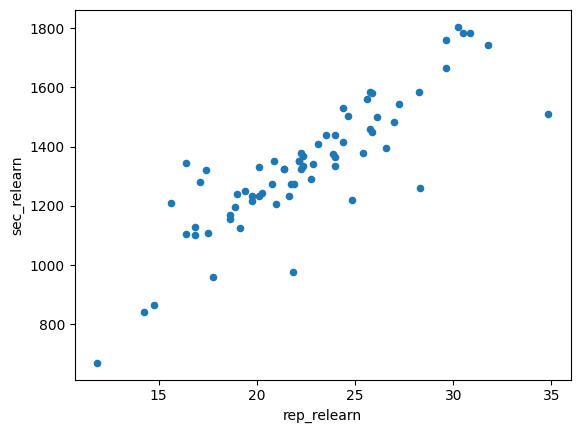

In [ ]:
# Your plotting code here:
df.plot.scatter(x="rep_relearn",
                 y="sec_relearn")

answer4 = "c"

In [13]:
grader.check("q4")

q4 results: All test cases passed!

**Question:**

As mentioned in the paper linked above, Ebbinghaus was interested in measuring a quantity called **savings**, which represents an amount of retained knowledge.

Create a function call `savings` using the template code below that calculates savings for a given single list and single interval. The function should return a single float. Refer to the paper for how savings should be calculated. It should be expressed as a proportion.

In [14]:
# Complete the function:

def savings(df, list_num, interval): # don't change this line!
    row = df[(df["list"] == list_num) & (df["interval"] == interval)]
    rep_learn = row.iloc[0]["rep_learn"]
    rep_relearn = row.iloc[0]["rep_relearn"]
    return (rep_learn - rep_relearn) / rep_learn

# Test it:
savings(df, 1, 24)

np.float64(0.40454545454545454)

In [15]:
grader.check("q5")

q5 results: All test cases passed!

**Question 6**

In the end, we are most interested in the overall effect of interval length on retention across all (stimuli) lists. Create a new dataframe called `df_avg` with averages of each behavioral measure by interval (i.e., averaged across lists). The column names should not change, and there should be a total of 5 columns.

In [16]:
# Your code here:

df_avg = df.groupby("interval")[["rep_learn", "rep_relearn", "sec_learn", "sec_relearn"]].mean()

# do not change this code or write code after it!
df_avg.reset_index(inplace=True)
df_avg.sort_values('interval', inplace=True)
df_avg

,interval,rep_learn,rep_relearn,sec_learn,sec_relearn
0,0.333333,30.767857,16.255357,1840.000000,1065.500000
1,1.000000,30.637500,19.212500,1842.000000,1224.500000
2,9.000000,31.068122,22.479497,1785.555556,1301.111111
3,24.000000,31.212500,21.325000,1860.500000,1275.000000
4,48.000000,31.412500,24.187500,1860.000000,1415.000000
5,144.000000,31.212500,25.962500,1883.000000,1535.500000
6,744.000000,29.385119,28.229167,1683.500000,1532.000000


In [17]:
grader.check("q6")

q6 results: All test cases passed!

**Question 7.** 

Add two columns to `df_avg` called `rep_savings` and `sec_savings` that contain the savings for repetitions and seconds, respectively.

In [18]:
# Your code here:
df_avg["rep_savings"] = (df_avg["rep_learn"] - df_avg["rep_relearn"]) / df_avg["rep_learn"]
df_avg["sec_savings"] = (df_avg["sec_learn"] - df_avg["sec_relearn"]) / df_avg["sec_learn"]

# for inspection
df_avg

,interval,rep_learn,rep_relearn,sec_learn,sec_relearn,rep_savings,sec_savings
0,0.333333,30.767857,16.255357,1840.000000,1065.500000,0.471677,0.420924
1,1.000000,30.637500,19.212500,1842.000000,1224.500000,0.372909,0.335233
2,9.000000,31.068122,22.479497,1785.555556,1301.111111,0.276445,0.271313
3,24.000000,31.212500,21.325000,1860.500000,1275.000000,0.316780,0.314700
4,48.000000,31.412500,24.187500,1860.000000,1415.000000,0.230004,0.239247
5,144.000000,31.212500,25.962500,1883.000000,1535.500000,0.168202,0.184546
6,744.000000,29.385119,28.229167,1683.500000,1532.000000,0.039338,0.089991


In [19]:
grader.check("q7")

q7 results: All test cases passed!

**Question 8**

Which interval corresponds to the largest reduction in effort required to relearn a list? Assign your answer as a float assigned to `biggest_reduction`.

In [20]:
biggest_reduction = df_avg.loc[df_avg["rep_savings"].idxmax(), "interval"]

In [21]:
grader.check("q8")

q8 results: All test cases passed!

Now, run the cell below to plot savings as a function of time intervals.

The result shows the mathematical relationship that Ebbinghaus discovered between savings and elapsed time.

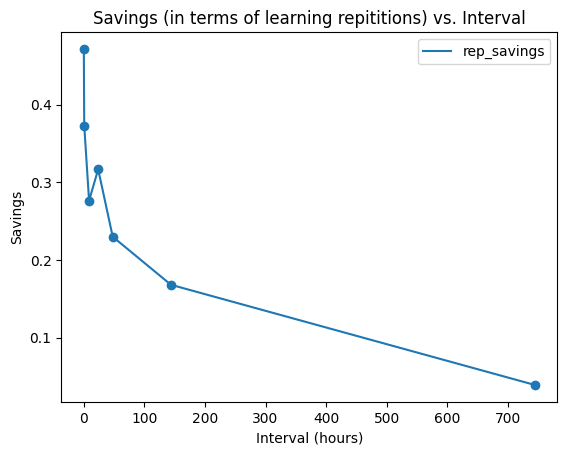

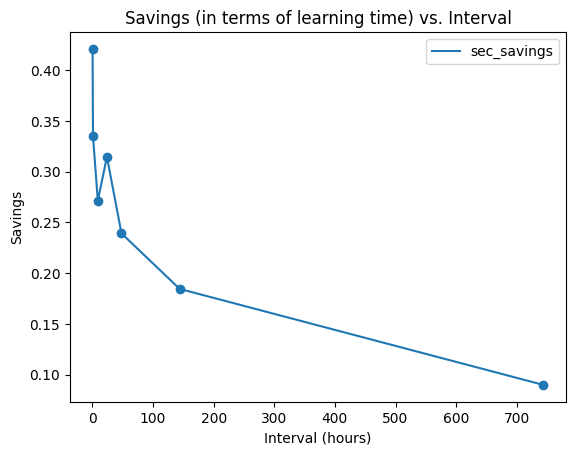

In [22]:
plt.plot(df_avg.interval, df_avg.rep_savings, label='rep_savings')
plt.scatter(df_avg.interval, df_avg.rep_savings)
plt.xlabel('Interval (hours)')
plt.ylabel('Savings')
plt.title('Savings (in terms of learning repititions) vs. Interval')
plt.legend()
plt.show()

plt.plot(df_avg.interval, df_avg.sec_savings, label='sec_savings')
plt.scatter(df_avg.interval, df_avg.sec_savings)
plt.xlabel('Interval (hours)')
plt.ylabel('Savings')
plt.title('Savings (in terms of learning time) vs. Interval')
plt.legend()
plt.show()

We can define the rate of forgetting as:

$$\frac{|\text{savings at earlier interval} - \text{savings at later interval}|}{\text{earlier interval} - \text{later interval}}$$

That is, the rate that we forget is the reduction in savings (retention)
between two intervals per unit of time.

To find where forgetting is most rapid, find the pair of consecutive intervals for which the rate of forgetting is highest. For ease, assign a float variable `later_interval` to the later of the two.

In [23]:
# Your code here:
intervals = df_avg["interval"].diff().iloc[1:]
savings = df_avg["rep_savings"].diff().abs().iloc[1:]
later_interval = df_avg.loc[(savings / intervals).idxmax(), "interval"]

In [24]:
grader.check("q9")

q9 results: All test cases passed!

#### Part 2: Study Designs

Suppose you want to conduct a study using an experimental design. Before manipulating your independent variable, you decide to assign participants to one of two groups (group 1 and group 2). 

You start with group 1 and ask 10 of your friends (most from your university) to participate in your study. 

After running out of willing friends, you turn to Reddit to ask for volunteers in your town. You get 10 volunteers from Reddit and assign them to group 2.

Run the cell below to see your current group assignment as well as a categorical variable noting whether or not the person has finished college or not.

Also shown is the percent (as a proportion) that have finished college by group.

In [25]:
people = pd.DataFrame({
    'group': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    'finished_college': [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
})
people

,group,finished_college
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [26]:
# percent (as a proportion) that have finished college by group
people.groupby('group').mean()

,finished_college
group,
1,0.9
2,0.5


**Question 10**

The `np.random.permutation()` function takes an array and returns an array with the same elements but with their order shuffled (e.g., 1, 2, 3 --> 3, 1, 2).

Based on what you have observed above, use the permutation function to modify the `people` dataframe below so that we can better ensure we are using an experimental design. The dataframe should maintain the same column names and no new column names should be added.

In [27]:
# do not change these lines
# just redefining the same exact data
people = pd.DataFrame({
    'group': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    'finished_college': [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
})
np.random.seed(1) # do not change this line either

# YOUR CODE HERE:
people["group"] = np.random.permutation(people["group"])

# do not change the below
people.groupby('group').mean() 

,finished_college
group,
1,0.7
2,0.7


In [28]:
grader.check("q10")

q10 results: All test cases passed!

**Question 10**

What kind of study is the above (in Part 1 of this assignment) by Jaap Murre and Joeri Dros?

Uncomment one of the two lines below to provide your answer.

In [29]:
# answer10 = "A standard experimental study"
answer10 = "A repeated measures study"

In [30]:
grader.check("q11")

q11 results: All test cases passed!